# [NIPA 활용과정] 앱 데이터 분석을 통한 평점 예측 실습

Kaggle에서 제공하는 구글 앱 데이터를 바탕으로 앱 평점을 예측해보는 머신러닝 실습을 수행해 보겠습니다.

데이터 출처: https://www.kaggle.com/gauthamp10/google-playstore-apps

이번 실습은 다음과 같은 과정으로 진행합니다.

1. **데이터 읽기:** 구글 앱 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악

4. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

5. **머신러닝 모델 수행:** 회귀 모델을 사용하여 학습 수행, 평가 및 예측 수행

> 이번 실습에서의 **최소한의 학습 목표**는 **데이터를 바탕으로 머신러닝의 결과물을 수행하는 전체적인 과정을 이해**하기입니다.
더욱 확실하게 목표를 이루기 위해서 학생들에게 기존 데이터에서 랜덤하게 뽑은 테스트 데이터를 바탕으로 배웠던 과정을 수행하여 결과물을 제출하게 합니다. 따라서 모든 학생이 위 목표를 달성 할 수 있는 방향으로 지도 부탁드립니다.

> 최소한의 학습 목표를 만족할 수 있는 학생이라면 **성능 지표를 높일 수 있는 방법을 찾는 것**이 **두 번째 목표**가 될 것입니다. 성능 지표를 높일 방법으로 본 실습에서는 크게 2가지 방식이 있습니다. 

> 1. **EDA 과정에서의 데이터 정제 및 특성 엔지니어링을 통한 성능 향상 방식**: EDA 과정은 데이터를 이해하는데 있어서 매우 중요한 과정이라 생각합니다. 사실 디테일하게 다루려면 온종일 할 수 있는 분량의 콘텐츠를 제작할 수 있지만, 본 실습을 수행하는데 많은 시간이 주어지지 않는다는 한계가 있기에 최소한의 EDA 과정만 다루게 됩니다. 따라서 변수마다 추가적인 이상치 처리 및 특성 엔지니어링을 통하여 성능을 높일 방법은 다양하게 있다 생각하며, 이 부분은 강의자께서도 여러 가지로 시도해보시면서 학생들에게 인사이트를 주면 좋을 거 같습니다.

> 2. **머신러닝 모델을 통한 성능 향상 방식**: EDA를 통한 데이터에 대한 이해 이후로 머신러닝 특징에 맞추어 모델을 선택하고 다양한 튜닝 방법을 통하여 성능을 높일 수 있습니다. 하지만 본 과정을 수강하는 학생들은 머신러닝 모델별로의 심도 있는 이해는 못 하는 단계라고 생각하기에 이 방식을 통한 성능 향상은 구현하기는 쉽지 않아 보입니다. 

In [2]:
!pip install --upgrade pip
!pip install -U pandas
!pip install -U numpy
!pip install -U scipy
!pip install -U scikit-learn
!pip install xgboost
!pip install lightgbm

Requirement already up-to-date: pip in c:\users\eunju\anaconda3\lib\site-packages (20.2.4)
Requirement already up-to-date: pandas in c:\users\eunju\anaconda3\lib\site-packages (1.1.4)
Requirement already up-to-date: numpy in c:\users\eunju\anaconda3\lib\site-packages (1.19.4)
Requirement already up-to-date: scipy in c:\users\eunju\anaconda3\lib\site-packages (1.5.4)
Requirement already up-to-date: scikit-learn in c:\users\eunju\anaconda3\lib\site-packages (0.23.2)


## 1. 데이터 읽기

> 이 파트에서는 **데이터를 읽는 방법을 익히고 어떠한 변수가 있는지 확인하는 방법**을 수행하는 것을 목표로 합니다. head, info 등의 함수에 대해서 설명해주시고 강의자분이 또 다른 방법들을 추가하여 설명하셔도 될 거 같습니다.

pandas를 사용하여 `Google-Playstore.csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 디렉토리 체크

작업을 하기 전에 현재 디렉토리가 어떻게 설정되어있는지 확인해줍니다.

current_path = os.chdir("/content/drive/MyDrive/Colab Notebooks/강의자료")
print(os.listdir(current_path))
print(os.getcwd()) #=> get current working directory

### 1.2 Google-Playstore.csv 데이터 불러오기

In [4]:
# Google-Playstore.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
df_origin = pd.read_csv('Google-Playstore.csv')

### 1.3 dataframe 및 요약본 출력해보기

In [5]:
df_origin.shape

(603047, 23)

In [6]:
# 5개의 데이터 샘플을 출력합니다.
df_origin.head() #앞 5개

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,foodpanda - Local Food & Grocery Delivery,com.global.foodpanda.android,Food & Drink,4.4,1258493.0,"10,000,000+",10000000.0,48828081,True,0.00,...,Foodpanda GmbH a subsidiary of Delivery Hero SE,http://foodpanda.com,appsupport@foodpanda.com,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,https://www.foodpanda.sg/contents/privacy.htm,False,False,False
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",com.tripadvisor.tripadvisor,Travel & Local,4.4,1360172.0,"100,000,000+",100000000.0,371284181,True,0.00,...,Tripadvisor,https://www.tripadvisor.com/help,mobilehelp@tripadvisor.com,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,https://www.tripadvisor.com/pages/privacy.html,True,False,False
2,Safeway Delivery & Pick Up,com.safeway.shop,Shopping,4.2,5532.0,"500,000+",500000.0,816102,True,0.00,...,"Albertsons Companies, Inc.",http://www.safeway.com,homeshopping@customerservice.safeway.com,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,http://www.safeway.com/ShopStores/Privacy-Poli...,False,False,False
3,My CookBook Ad-Free,fr.cookbookpro,Food & Drink,4.7,2531.0,"10,000+",10000.0,16171,False,5.99,...,Maadinfo Services,https://www.mycookbook-online.net,support@mycookbook-online.net,"Sep 25, 2011",2020-07-07 12:41:28,Everyone,https://www.mycookbook-android.com/site/privac...,False,False,False
4,Talabat: Food & Grocery Delivery,com.talabat,Food & Drink,4.4,197649.0,"5,000,000+",5000000.0,9218590,True,0.00,...,Talabat,http://www.talabat.com,info@talabat.com,"Jan 19, 2012",2020-07-15 19:21:16,Mature 17+,https://www.talabat.com/kuwait/privacy,True,False,False


In [7]:
# dataframe의 정보를 요약해서 출력합니다.
df_origin.info()
# row 개수와 개수가 다른 변수들이 있음 => 비어있음 => 나중에 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603047 entries, 0 to 603046
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           603046 non-null  object 
 1   App Id             603047 non-null  object 
 2   Category           603047 non-null  object 
 3   Rating             599287 non-null  float64
 4   Rating Count       599287 non-null  float64
 5   Installs           602875 non-null  object 
 6   Minimum Installs   602875 non-null  float64
 7   Maximum Installs   603047 non-null  int64  
 8   Free               603047 non-null  bool   
 9   Price              603047 non-null  float64
 10  Currency           602866 non-null  object 
 11  Size               603047 non-null  object 
 12  Minimum Android    602556 non-null  object 
 13  Developer Id       603045 non-null  object 
 14  Developer Website  423783 non-null  object 
 15  Developer Email    603010 non-null  object 
 16  Re

In [8]:
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
df_origin.describe() # => float 타입의 데이터들만 요약할 수 있으므로 이 변수들만 있음

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,599287.000000,5.992870e+05,6.028750e+05,6.030470e+05,603047.000000
mean,2.995484,8.627273e+03,4.997939e+05,8.566150e+05,0.248818
std,1.911436,3.467317e+05,2.523102e+07,3.755474e+07,3.392709
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,1.000000e+02,4.680000e+02,0.000000
50%,4.000000,2.900000e+01,5.000000e+03,5.034000e+03,0.000000
75%,4.400000,2.560000e+02,1.000000e+04,4.346500e+04,0.000000
max,5.000000,1.170193e+08,5.000000e+09,9.975727e+09,400.000000


In [9]:
df_origin.corr()["Rating"]

#위의 상관관계에서 Free,Ad Supported,In App Purchases,Editors Choice가 주요 변수라 생각되어 해당 변수는 남기기로 했다.

Rating              1.000000
Rating Count        0.016980
Minimum Installs    0.012640
Maximum Installs    0.014608
Free                0.029064
Price              -0.014955
Ad Supported        0.153105
In App Purchases    0.164163
Editors Choice      0.025952
Name: Rating, dtype: float64

## 2. 데이터 정제

> 일반적으로 각 변수의 분포를 살펴보며 데이터 정제를 수행하는 것이 바르다고 생각하지만, 학생들이 EDA 방법론에 대한 지식이 부족하다고 생각합니다. 따라서 이번 과정에서는 결측값과 이상치에 대한 개념을 소개하고 이를 처리하는 방식에 대해서 알아가는 파트라 생각하시면 될 거 같습니다. 

> 여기서 다루지 않은 결측값 처리 방식 등에 대해서도 간단하게 소개해주시면 될 거 같습니다. (시간이 있다면요) 

데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)**를 처리합니다.

일반적으로는 각 변수에 대해서 자세히 살펴보면서 결측값과 이상치를 제거를 수행합니다.

이번 파트에서는 간단한 결측값 처리 방식인 삭제 방식을 수행해 보고 다음 과정에서 이어서 데이터 정제를 수행해보겠습니다.

### 2.1. 변수 삭제

In [10]:
# drop 함수를 사용하여 변수들을 삭제합니다.
df_clean= df_origin.drop(columns=[
    'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 
    'Privacy Policy', 'Minimum Installs', 'Maximum Installs',
    'Minimum Android','Currency'
], axis=1)
df_clean.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,"10,000,000+",True,0.00,21M,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,False,False,False
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,"100,000,000+",True,0.00,Varies with device,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,True,False,False
2,Safeway Delivery & Pick Up,Shopping,4.2,5532.0,"500,000+",True,0.00,12M,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,False,False,False
3,My CookBook Ad-Free,Food & Drink,4.7,2531.0,"10,000+",False,5.99,Varies with device,"Sep 25, 2011",2020-07-07 12:41:28,Everyone,False,False,False
4,Talabat: Food & Grocery Delivery,Food & Drink,4.4,197649.0,"5,000,000+",True,0.00,Varies with device,"Jan 19, 2012",2020-07-15 19:21:16,Mature 17+,True,False,False


### 2.2. 결측값 확인

아래 코드를 수행하여 각 변수별로 결측값이 몇개가 있는지 확인합니다.

---



In [11]:
# 결측값 정보를 출력합니다.
# df_clean.isnull()
df_clean.isnull().sum()

App Name                1
Category                0
Rating               3760
Rating Count         3760
Installs              172
Free                    0
Price                   0
Size                    0
Released            32278
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [12]:
# 'Rating'에 있는 결측값 데이터에서 'Rating Count' 변수의 데이터를 출력합니다.
# (1) df_clean['Rating'].isnull()
# (2) df_clean[df_clean['Rating'].isnull()]
# (3) df_clean[df_clean['Rating'].isnull()]['Rating Count']
# (4)
df_clean[df_clean['Rating'].isnull()]['Rating Count'].unique()

array([nan])

위 결과를 통하여 `Rating`, `Rating Count`의 결측값의 인덱스는 같음을 알 수 있습니다.

### 2.3. 결측값 처리

결측값 처리 방법 → 분포 파악 & 도메인 지식 활용

---


1. 삭제
2. 평균값 처리
3. 중간값 처리
4. 도메인 지식으로 특정값으로 처리

등등

In [13]:
# dropna를 사용하여 결측값이 있는 샘플들을 삭제합니다.
df_clean = df_clean.dropna()

In [14]:
# 결측값을 정보를 출력합니다.
df_clean.isnull().sum() #=>개수확인

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Free                0
Price               0
Size                0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

## 3. 데이터 시각화 & 추가 데이터 정제

> 가장 시간이 많이 들어갈 파트라 생각합니다. 가장 기본적으로 numerical 데이터와 object 데이터의 차이점에 대해서 알려주시고 각 데이터 형태에 따라 시각화 방식으로 어떤 것이 있는지 알려주시는 방식으로 지도하시면 될 거 같습니다.

> 본 실습에서는 각 변수에 대한 분포만을 시각화 하였지만, 여유가 있다면 변수 간의 시각화도 하면 좋을 거 같습니다. 특히 label인 Rating 데이터와의 시각화 방식을 통하여 거시적인 경향성을 볼 수 있다는 점을 알려주시면 좋을 거 같습니다.

> 3.1. Rating & Rating Count에서 0인 데이터가 있기에 이들은 추가 데이터 정제를 수행하여 삭제합니다.

> 3.2. Installs 데이터는 문자형 데이터이기에 수치형 데이터로 변환합니다.

> 3.3. Last Updated 데이터에는 너무나 다양한 시간 정보가 하나로 저장되어 있기에 의미 있는 변수로 사용하기 위하여 올해 업데이트가 되었는지를 알 수 있는 Last update since 2020를 추가합니다.

각 변수 분포를 알아보기 위하여 시각화를 수행하겠습니다.

시각화를 통해서 변수 내에 결측값 또는 이상치 처리가 필요하다 생각되면 이를 수행하고 또한 변수의 문자형 데이터를 숫자형 데이터로 변환하는 **특성 엔지니어링(Feature engineering)** 또한 수행해보겠습니다.

### 3.1. `Rating` & `Rating Count` 시각화

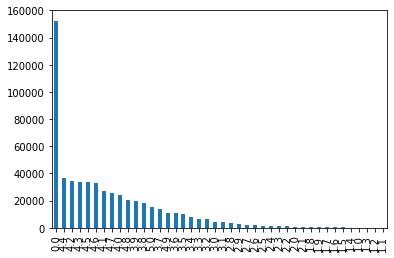

In [15]:
# 분포를 도수분포표로 확인합니다.
df_clean['Rating'].value_counts()

# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Rating'].value_counts().plot(kind='bar')

In [16]:
# Rating 값이 0인 데이터의 개수를 출력합니다.
len(df_clean[df_clean['Rating'] == 0])

152428

In [17]:
# Rating Count 값이 0인 데이터의 개수를 출력합니다.
len(df_clean[df_clean['Rating Count'] == 0])

152428

In [18]:
# 데이터 확인
df_clean['Rating Count'].value_counts()

# 'Rating Count' 값이 10보다 큰 경우 부터 의미 있는 데이터로 생각하고 10보다 작은 데이터는 삭제합니다.
df_clean = df_clean[df_clean['Rating Count'] > 10]

5.0     5583
4.9     9012
4.8    17086
4.7    23573
4.6    29655
4.5    31681
4.4    32999
4.3    30827
4.2    29988
4.1    24969
4.0    20909
3.9    17771
3.8    16104
3.7    12033
3.6     9458
3.5     8890
3.4     6501
3.3     5494
3.2     5173
3.1     3787
3.0     3344
2.9     2719
2.8     2570
2.7     1975
2.6     1649
2.5     1433
2.4     1162
2.3     1039
2.2      972
2.1      752
2.0      655
1.9      509
1.8      429
1.7      310
1.6      251
1.5      208
1.4      142
1.3       77
1.2       52
1.1       24
1.0       12
Name: Rating, dtype: int64

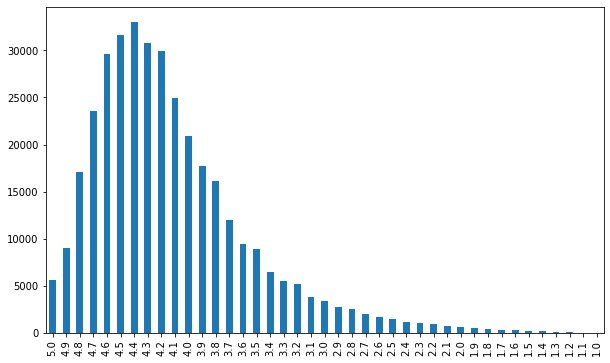

In [19]:
# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(10, 6))  #이렇게 하면 매 셀마다 설정해줘야 함 => 커스터마이징 https://matplotlib.org/tutorials/introductory/customizing.html

# 추가 정제한 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Rating'].value_counts().sort_index(ascending=False).plot(kind='bar')

# 추가 정제한 분포를 도수분포표로 확인합니다.
df_clean['Rating'].value_counts().sort_index(ascending=False)

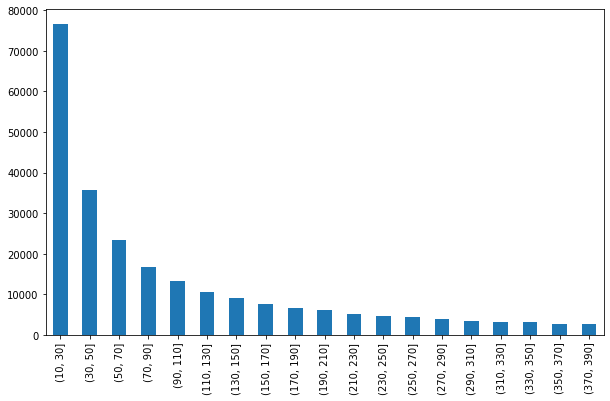

In [20]:
# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(10, 6))

# pd.cut을 사용하여 데이터를 분리하고 그 분포를 막대 그래프로 출력합니다.
pd.cut(df_clean['Rating Count'], np.arange(10,410,20)).value_counts().sort_index(ascending=True).plot(kind='bar')

### 3.2. `Installs` 시각화

0+                    13
1+                    15
1,000+             58573
1,000,000+         19659
1,000,000,000+        41
10+                  244
10,000+           104491
10,000,000+         4182
100+                7089
100,000+           57059
100,000,000+         357
5+                     8
5,000+             43793
5,000,000+          4251
5,000,000,000+        10
50+                  581
50,000+            36418
50,000,000+          581
500+                9499
500,000+           14869
500,000,000+          44
Name: Installs, dtype: int64

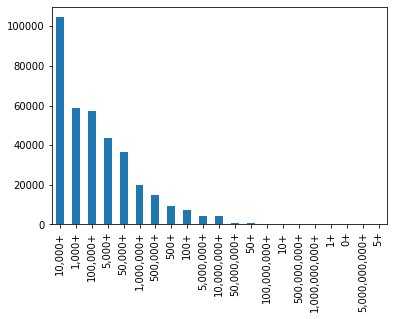

In [21]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Installs'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Installs'].value_counts().sort_index(ascending=True)

In [22]:
# 문자열 데이터를 숫치 자료형으로 변환합니다.
# + 삭제, 쉼표 삭제, int형 변화
for element in set(df_clean['Installs']):
    # (1) element.split('+')
    # (2) element.split('+')[0]
    # (3) element.split('+')[0].replace(',', '')
    # (4) int(element.split('+')[0].replace(',', '')))
    # (5) 
    df_clean = df_clean.replace(element,int(element.split('+')[0].replace(',', '')))

0                 13
1                 15
5                  8
10               244
50               581
100             7089
500             9499
1000           58573
5000           43793
10000         104491
50000          36418
100000         57059
500000         14869
1000000        19659
5000000         4251
10000000        4182
50000000         581
100000000        357
500000000         44
1000000000        41
5000000000        10
Name: Installs, dtype: int64

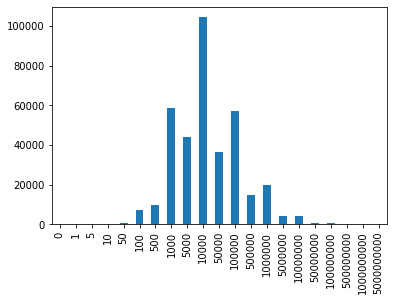

In [23]:
# 변환된 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')

# 변환된 분포를 도수분포표로 확인합니다.
df_clean['Installs'].value_counts().sort_index(ascending=True)

In [24]:
# 위 분포에서 양쪽 끝의 데이터들이 너무 작기에 이를 추가로 삭제합니다.
# 500000개 초과는 1000000으로 변환
df_clean.loc[df_clean['Installs']>500000,'Installs'] = 1000000
df_clean[df_clean['Installs']>500000]

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,1000000,True,0.0,21M,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,False,False,False
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,1000000,True,0.0,Varies with device,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,True,False,False
4,Talabat: Food & Grocery Delivery,Food & Drink,4.4,197649.0,1000000,True,0.0,Varies with device,"Jan 19, 2012",2020-07-15 19:21:16,Mature 17+,True,False,False
5,DoorDash - Food Delivery,Food & Drink,4.5,784802.0,1000000,True,0.0,38M,"Mar 26, 2015",2020-06-26 01:32:02,Everyone,False,False,False
9,Allrecipes Dinner Spinner,Food & Drink,4.6,77371.0,1000000,True,0.0,Varies with device,"Mar 11, 2011",2019-06-03 19:58:32,Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602276,Ghost House Escape,Adventure,3.9,19759.0,1000000,True,0.0,72M,"May 19, 2016",2019-09-02 00:40:57,Everyone,True,True,False
602278,Zombie Invasion : Escape,Action,3.9,18371.0,1000000,True,0.0,22M,"May 29, 2013",2016-08-30 19:42:49,Teen,True,True,False
602281,Prison Break: The Great Escape,Action,3.9,13909.0,1000000,True,0.0,81M,"Jul 27, 2017",2019-11-07 20:21:28,Teen,True,True,False
602282,Prison Break: Lockdown (Free),Action,4.1,194358.0,1000000,True,0.0,44M,"Jun 5, 2015",2019-09-15 21:35:34,Teen,True,True,False


In [25]:
# 5000개 미만은 1000으로 변환
df_clean.loc[df_clean['Installs']<5000,'Installs'] = 1000
df_clean[df_clean['Installs']<5000]

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
46,Martha Stewart TV,Lifestyle,4.1,28.0,1000,True,0.0,29M,"Sep 25, 2018",2020-07-15 01:44:32,Everyone,False,True,False
64,Money Manager - Track your expenses,Finance,4.4,163.0,1000,True,0.0,5.0M,"Jun 4, 2019",2020-06-02 14:32:02,Everyone,True,True,False
67,PeaceMe - Meditate & Sleep,Health & Fitness,4.7,39.0,1000,True,0.0,37M,"Feb 7, 2020",2020-05-20 15:52:42,Everyone,False,True,False
68,GreenChoice: Healthy Grocery Shopping,Food & Drink,4.7,19.0,1000,True,0.0,30M,"Apr 27, 2019",2020-07-22 01:55:13,Everyone,False,False,False
85,FIKASO - Livraison de Repas et de Courses,Food & Drink,4.4,15.0,1000,True,0.0,21M,"Sep 25, 2019",2019-09-23 09:56:34,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602909,Camping Capo Ferrato,Travel & Local,5.0,11.0,1000,True,0.0,28M,"Jun 10, 2016",2019-07-17 20:10:50,Everyone,False,False,False
602933,Ultimate Rock Ballads,Entertainment,4.9,28.0,1000,True,0.0,3.5M,"Oct 5, 2018",2020-04-03 13:22:44,Teen,True,False,False
602941,8 Ball,Sports,4.1,28.0,1000,True,0.0,16M,"Sep 10, 2014",2020-02-16 11:36:47,Everyone,True,False,False
602943,Billiards:8 Ball 2-Pocket,Sports,4.3,22.0,1000,True,0.0,21M,"Apr 8, 2016",2020-02-16 09:41:00,Everyone,True,False,False


1000        76022
5000        43793
10000      104491
50000       36418
100000      57059
500000      14869
1000000     29125
Name: Installs, dtype: int64

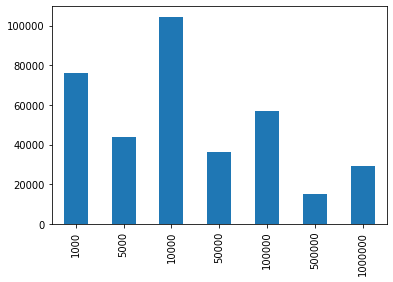

In [26]:
# 다시 분포를 출력합니다.
df_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')
df_clean['Installs'].value_counts().sort_index(ascending=True)

### 3.3. `Free` 시각화

True     345154
False     16623
Name: Free, dtype: int64

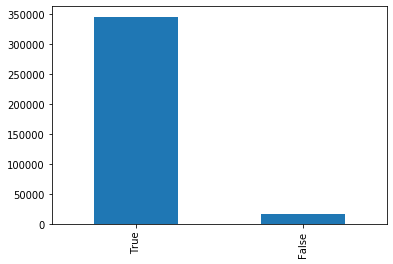

In [27]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Free'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Free'].value_counts()

### 3.4. `Last Updated` 시각화

In [28]:
# 분포를 도수분포표로 확인합니다.
df_clean['Last Updated'].value_counts()

2020-07-13 07:39:47    4
2020-07-13 07:38:00    4
2020-07-08 14:07:44    4
2020-07-13 07:38:25    4
2020-07-13 07:39:18    4
                      ..
2019-03-04 00:53:31    1
2018-08-21 01:37:01    1
2020-05-25 20:04:41    1
2020-07-01 17:52:05    1
2020-06-25 11:38:38    1
Name: Last Updated, Length: 360090, dtype: int64

In [29]:
# 날짜와 시간 정보인 Last Updated를 가공하여 새로운 정보를 갖는 데이터를 만들어 저장해봅시다.
# 간단하게 올해 업데이트가 되었는지 안되었는지를 알 수 있는 'Last update since 2020' 변수를 만들어 추가해봅시다.

# 1. df_clean['Last Updated']
# 2. for d in df_clean['Last Updated']:
#       print(d)

#3. for d in df_clean['Last Updated']:
#       print(d.split("-")[0])

#4. [d.split('-')[0] == '2020' for d in df_clean['Last Updated']]
df_clean['Last update since 2020'] = [d.split('-')[0] == '2020' for d in df_clean['Last Updated']]

False    197957
True     163820
Name: Last update since 2020, dtype: int64

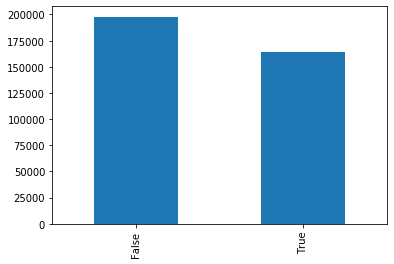

In [30]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Last update since 2020'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Last update since 2020'].value_counts()

### 3.5. `Content Rating` 시각화 

Everyone           316911
Teen                29055
Everyone 10+         7895
Mature 17+           7880
Unrated                19
Adults only 18+        17
Name: Content Rating, dtype: int64

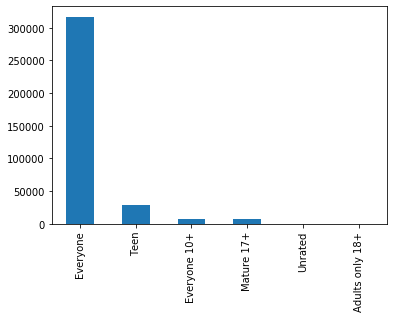

In [31]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Content Rating'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Content Rating'].value_counts()

### 3.6. `Ad Supported` 시각화 

True     219578
False    142199
Name: Ad Supported, dtype: int64

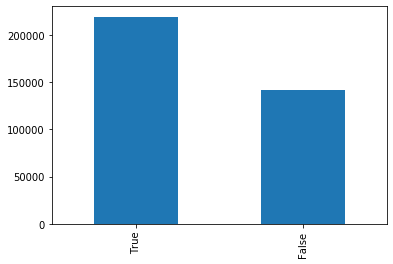

In [32]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Ad Supported'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Ad Supported'].value_counts()

### 3.7. `In App Purchases` 시각화 

False    292902
True      68875
Name: In App Purchases, dtype: int64

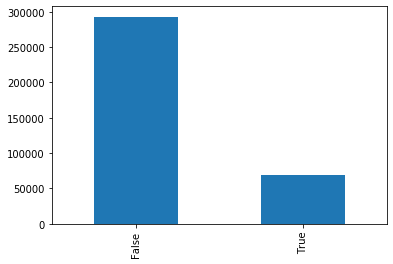

In [33]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['In App Purchases'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['In App Purchases'].value_counts()

### 3.8. `Editors Choice` 시각화 

False    361005
True        772
Name: Editors Choice, dtype: int64

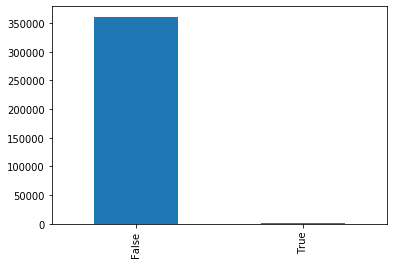

In [34]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Editors Choice'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Editors Choice'].value_counts()

## 4. 데이터 전처리

> 머신러닝 모델을 사용하기 위해서 데이터를 준비하는 파트입니다. 본 실습에서는 특성 엔지니어링 기법 중 더미(dummy) 방식과 학습&테스트 데이터를 분리 하는 과정을 다룹니다. 

> 본 실습에서의 더미에서는 어떠한 데이터를 머신러닝의 feature로 사용할 것인가를 결정하는 중요한 파트라 생각합니다. 0,1만을 사용하는 더미 방식 외에 object 자료형을 변환하는 다양한 기법들이 있고 이를 어떻게 적용하느냐에 따라 성능에 큰 영향을 줄 수 있다는 지도가 있었으면 합니다.

> 학습, 테스트 분리에서는 왜 데이터를 분리에서 사용하는지에 대한 설명이 해주시면 좋을 거 같습니다.


> 추가로 데이터 정규화를 수행하는데 StandardScaler 이외의 minmax 정규화 등의 다양한 기법들을 소개해주시고 왜 정규화가 필요한지를 지도하면 좋을 거 같습니다.

앱 평점 예측을 수행하기 위해서 주어진 구글 앱 데이터에 대해서 회귀 모델을 사용할 것입니다.

이번 파트에서는 11개의 변수만을 사용하여 예측을 수행하지만, 나머지 12개의 변수들을 추가하여 입력 데이터를 확장할 수 있습니다.

회귀 모델의 필요한 입력 데이터를 준비 하기위해서 다음과 같은 전처리를 수행하겠습니다.

1. Object 자료형 -> 숫자 자료형 변환하기
2. 학습 데이터와 테스트 데이터로 나누기

### 4.1. 더미변수(Dummy Variable)를 활용하여 Object 자료형을 수치형으로 변환

---



일반적인 머신러닝 모델에서는 수치 자료형만을 입력값으로 사용합니다. 따라서 수치 자료형만을 사용하여 입력값으로 사용할 수 있지만, 신용 예측을 위한 데이터에 존재하는 `Content Rating` 변수의 데이터들은 중요한 정보일 수 잇는 object 자료형을 사용할 수가 없습니다.

그렇기에 이러한 object 자료형을 수치 자료형으로 변환하는 dummy 방식을 사용하여 다양한 데이터를 수치형 입력으로 사용해 봅시다.

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361777 entries, 0 to 603006
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App Name                361777 non-null  object 
 1   Category                361777 non-null  object 
 2   Rating                  361777 non-null  float64
 3   Rating Count            361777 non-null  float64
 4   Installs                361777 non-null  int64  
 5   Free                    361777 non-null  bool   
 6   Price                   361777 non-null  float64
 7   Size                    361777 non-null  object 
 8   Released                361777 non-null  object 
 9   Last Updated            361777 non-null  object 
 10  Content Rating          361777 non-null  object 
 11  Ad Supported            361777 non-null  bool   
 12  In App Purchases        361777 non-null  bool   
 13  Editors Choice          361777 non-null  bool   
 14  Last update since 20

In [36]:
df_clean.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Last update since 2020
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,1000000,True,0.00,21M,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,False,False,False,True
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,1000000,True,0.00,Varies with device,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,True,False,False,True
2,Safeway Delivery & Pick Up,Shopping,4.2,5532.0,500000,True,0.00,12M,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,False,False,False,True
3,My CookBook Ad-Free,Food & Drink,4.7,2531.0,10000,False,5.99,Varies with device,"Sep 25, 2011",2020-07-07 12:41:28,Everyone,False,False,False,True
4,Talabat: Food & Grocery Delivery,Food & Drink,4.4,197649.0,1000000,True,0.00,Varies with device,"Jan 19, 2012",2020-07-15 19:21:16,Mature 17+,True,False,False,True


In [42]:
df_clean['Size'] = df_clean['Size'].replace('Varies with device', np.nan)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361777 entries, 0 to 603006
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App Name                361777 non-null  object 
 1   Category                361777 non-null  object 
 2   Rating                  361777 non-null  float64
 3   Rating Count            361777 non-null  float64
 4   Installs                361777 non-null  int64  
 5   Free                    361777 non-null  bool   
 6   Price                   361777 non-null  float64
 7   Size                    343899 non-null  object 
 8   Released                361777 non-null  object 
 9   Last Updated            361777 non-null  object 
 10  Content Rating          361777 non-null  object 
 11  Ad Supported            361777 non-null  bool   
 12  In App Purchases        361777 non-null  bool   
 13  Editors Choice          361777 non-null  bool   
 14  Last update since 20

In [62]:
df_clean['Size'] = df_clean['Size'].str.strip("M,")

In [66]:
df_clean.head(3)

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Last update since 2020
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,1000000,1,0.0,21,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,0,0,0,1
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,1000000,1,0.0,NaN,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,1,0,0,1
2,Safeway Delivery & Pick Up,Shopping,4.2,5532.0,500000,1,0.0,12,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,0,0,0,1


In [67]:
df_clean = df_clean.dropna()

In [72]:
df_clean.loc[0:11]

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Last update since 2020
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,1000000,1,0.0,21,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,0,0,0,1
2,Safeway Delivery & Pick Up,Shopping,4.2,5532.0,500000,1,0.0,12,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,0,0,0,1
5,DoorDash - Food Delivery,Food & Drink,4.5,784802.0,1000000,1,0.0,38,"Mar 26, 2015",2020-06-26 01:32:02,Everyone,0,0,0,1
6,Peapod Delivery,Shopping,2.8,2487.0,500000,1,0.0,30,"Sep 2, 2010",2020-07-12 01:31:51,Everyone,1,0,0,1
8,FreshDirect,Shopping,2.1,893.0,100000,1,0.0,59,"Aug 25, 2011",2020-07-02 20:15:03,Everyone,1,0,0,1
10,Fast Food Locator | Worldwide Fast Food Finder,Travel & Local,3.7,91.0,10000,1,0.0,4.9,"Jun 1, 2014",2020-07-01 00:56:54,Everyone,1,1,0,1


In [73]:
df_clean.astype({'Size':'float'}).dtypes

ValueError: could not convert string to float: '297k'

In [49]:
# 2개의 카테고리를 갖는 데이터는 replace를 사용하여 0,1로 변환 합니다.
df_clean = df_clean.replace([True,False],[1,0])

# object 자료형 데이터의 변수를 정리합니다.
chr_features = ['Content Rating','Category']

# 수치 자료형 데이터의 변수를 정리합니다.
num_features=['Rating Count', 'Installs', 'Size', 'Free', 'Price', 'Last update since 2020', 'Ad Supported','In App Purchases', 'Editors Choice']

# 더미를 기법을 사용하여 변환합니다.
for variable in chr_features:
    
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
    dummies = pd.get_dummies(df_clean[chr_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
    df_dummy= pd.concat([df_clean[num_features], dummies],axis=1)

In [50]:
df_dummy.columns

Index(['Rating Count', 'Installs', 'Size', 'Free', 'Price',
       'Last update since 2020', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Category_Action', 'Category_Adventure',
       'Category_Arcade', 'Category_Art & Design', 'Category_Auto & Vehicles',
       'Category_Beauty', 'Category_Board', 'Category_Books & Reference',
       'Category_Business', 'Category_Card', 'Category_Casino',
       'Category_Casual', 'Category_Comics', 'Category_Communication',
       'Category_Dating', 'Category_Education', 'Category_Educational',
       'Category_Entertainment', 'Category_Events', 'Category_Finance',
       'Category_Food & Drink', 'Category_Health & Fitness',
       'Category_House & Home', 'Category_Libraries & Demo',
       'Category_Lifestyle', 'Category_Maps & Navigation', '

In [51]:
# 더미로 구한 데이터를 numpy 형태로 머신러닝 입력값인 x에 저장합니다.
x = df_dummy.to_numpy()
print(np.shape(x))

(361777, 63)


In [52]:
# 예측해야 할 변수 `Rating`만을 선택하여 numpy 형태로 y에 저장합니다.
y = df_clean['Rating']
#dimension check
print(np.shape(y.to_numpy()))
y = y.to_numpy()
#y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용 => 이미 1차원이므로 딱히 필요 없음


(361777,)


### 4.2. 학습, 테스트 데이터 분리

---



머신러닝의 성능을 평가 하기 위해서는 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터를 나누어 사용합니다.

<Train set과 Test set을 나누는 이유> 

우리는 새로운 데이터에 이 모델이 얼마나 잘 들어맞는지 알고 싶습니다. 그런데 가지고 있는 데이터를 모두 모델 만드는데 써버리면, 그 모델이 새로운 데이터에 얼마나 잘 들어맞는지 모르게 됩니다. 그래서 보유한 데이터에서 test set을 따로 떼어놓고 training set으로만 모델을 만든 다음, test set으로 새로운 데이터에 얼마나 잘 들어맞는지 확인합니다

In [53]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손 쉽게 분리 할 수 있습니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

### 4.3. 데이터 정규화

정규화 이유
1. 정규화하지 않으면 스케일이 큰 변수가 영향을 크게 받아 다른 변수를 잡아먹는다 

2. 단위가 모두 다르기 때문에 모든 변수를 같은 스케일로 맞춤

a. min-max

b. standardization → 표준정규분포로 만들기 


각 변수 마다의 스케일 차이를 맞추기 위하여 정규화를 수행합니다.

In [54]:
from sklearn.preprocessing import StandardScaler #사이킷런

# 정규화를 위해서 StandardScaler 불러오기
sc = StandardScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ValueError: could not convert string to float: '593k'

## 5. 머신러닝 모델 수행

> 머신러닝 모델의 경우에는 단순 선형 회귀, 다항 회귀, 트리모델 간의 장단점을 위주로 설명해주셨으면 좋겠습니다. 각 모델의 원리와 파라미터와 특징에 대해서 설명하게 되면 너무나 많은 힘이 들기에 간단하게 sklearn에서의 사용법과 평가 방식에 힘을 들여 설명해주시면 좋을 거 같습니다.

> 평가 방식으로는 RMSE와 R2를 사용하기에 이에 대한 설명을 꼭 해주셨으면 좋겠습니다.

> 평가방법: 
> RMSE(Root Mean Square Error, 평균 제곱근 오차)

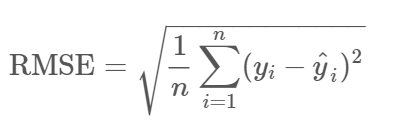

전처리된 데이터를 바탕으로 회귀 모델을 학습을 수행하고 학습 결과를 출력 해봅니다.

먼저 기본적인 회귀 모델인 **단순 선형 회귀(Simple linear regression)**를 사용하여 학습을 수행하고, 다양한 모델들을 살펴봅시다.

### 5.1. 단순 선형 회귀

회귀(Regression) 라는 개념은 

#### 5.1.1. 학습

In [56]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 class를 불러옵니다.
model = LinearRegression()

# fit 함수를 사용하여 학습을 수행합니다.
model.fit(x_train, y_train)

ValueError: could not convert string to float: '593k'

#### 5.1.2. 평가

회귀분석에서는 결정계수(R^2)라는 평가 방법도 추가로 활용합니다.
결정계수란, 해당 모델이 데이터를 얼마나 잘 설명하는지를 나타냅니다.


In [57]:
from sklearn.metrics import r2_score, mean_squared_error

# 학습 데이터의 예측값을 저장합니다.
pred_train = model.predict(x_train)

# 학습 데이터의 성능을 저장합니다.
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

# 테스트 데이터의 예측값을 저장합니다.
pred_test = model.predict(x_test)

# 테스트 데이터의 성능을 저장합니다.
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 성능을 출력합니다.
print('train data RMSE: ', np.sqrt(mse_train))
print('train data R2: ', r2_train)

print('test data RMSE: ', np.sqrt(mse_test))
print('test data R2: ', r2_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### 5.1.3. 예측

In [58]:
# 0번부터 9번까지 10개를 출력해 보겠습니다.
for i in range(10): 
    
    #1.prediction = model.predict(x_test[i]) => 에러
    #2.prediction = model.predict(x_test[i].reshape(1,-1))
    #3.print(predition)
    #4.print(prediction[0])

    prediction = model.predict(x_test[i].reshape(1,-1))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 5.2. 다항 회귀 모델

#### 5.2.1. 학습

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 우리가 위에서 사용한 모델은 선형회귀 => 직선
# 다항 회귀 모델을 사용하기 위해서는 PolynomialFeatures를 사용하여 고차항 변수를 생성합니다.
# interaction_only=True 를 사용하면 변수 간의 곱을 고려하지 않기에 모델이 간소화 됩니다.
# interaction_only=False 사용 시 모델은 복잡해지고 학습 시간이 매우 증가합니다. => 계량적(?)으로 고려해야한다. interaction Term
poly = PolynomialFeatures(degree=3, interaction_only=True) #데이터가 3차원식으로 생겼을 때 이렇게 쓰면 선형보다 잘 나올 것임

# x_train 데이터를 다항 회귀에 필요한 입력값으로 변환합니다.
x_train_poly = poly.fit_transform(x_train)
x_train_poly

In [ ]:
# 선형 회귀 모델을 선언합니다.
# 선형 회귀 모델이지만 다항 회귀도 수행할 수 있습니다.
# n_jobs=-1을 설정하여 모든 프로세서를 사용하여 학습의 속도를 높입니다. #멀티코어 #default = 싱글코어
model_poly = LinearRegression(n_jobs=-1)

# 학습을 수행합니다.
model_poly = model_poly.fit(x_train_poly, y_train)

#### 5.2.2. 평가

In [ ]:
# 테스트 데이터를 변환합니다.
x_test_poly = poly.fit_transform(x_test)

# 학습 데이터의 예측값을 저장합니다.
pred_train = model_poly.predict(x_train_poly)

# 학습 데이터의 성능을 저장합니다.
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# 테스트 데이터의 예측값을 저장합니다.
pred_test = model_poly.predict(x_test_poly)

# 테스트 데이터의 성능을 저장합니다.
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, pred_test)

# 성능을 출력합니다.
print('train data RMSE: ', rmse_train)
print('train data R2: ', r2_train)

print('test data RMSE: ', rmse_test)
print('test data R2: ', r2_test)

#### 5.2.3. 예측

In [ ]:
# 0번부터 9번까지 10개를 출력해 보겠습니다.
for i in range(10): 
    
    prediction = model_poly.predict(x_test_poly[i].reshape(1,-1))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

### 5.3. 의사결정나무 & 랜덤포레스트 & 앙상블기법들

In [ ]:
!pip install xgboost
!pip install lightgbm

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

models = []
models.append(('CART', DecisionTreeRegressor())) # 의사결정나무 모델 #CART는 의사결정나무 중 알고리즘 이름
models.append(('RandomForest', RandomForestRegressor(n_jobs=-1))) # 랜덤포레스트 모델
models.append(('XGB', XGBRegressor(n_jobs=-1))) 
models.append(('lightGBM', LGBMRegressor(n_jobs=-1)))

for name, model in models:
    model.fit(x_train, y_train)
    model.predict(x_train)

    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)

    r2_train = r2_score(y_train, model.predict(x_train))
    r2_test = r2_score(y_test, model.predict(x_test))

    result_1 = "%s - train_RMSE_score : %f, test_RMSE_score : %f" % (name, mse_train, mse_test)
    result_2 = "%s - train_R2_score : %f, test_R2_score : %f" % (name, r2_train , r2_test) 
    print(result_1)
    print(result_2)
    print("="*80)

ValueError: could not convert string to float: '593k'

In [ ]:
# 각 모델마다 0번부터 9번까지 10개의 예측 결과를 출력해 보겠습니다.

for i in range(len(models)):
    print("{} 모델".format(models[i][0]))
    for j in range(10): 
    
        prediction = models[i][1].predict(x_test[j].reshape(1,-1))
        print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(j, prediction[0], y_test[j]))
    print("="*80)

## 위 과정의 결과 Xgb & lightGBM의 모델이 가장 결과가 좋게 나와서 해당 모델을 적용하였습니다.

In [ ]:
df_origin2 = pd.read_csv('webapp_test_feature.csv')

In [ ]:
df_origin2.head()

In [ ]:
df_origin2.info()

In [ ]:
#trn 정제 과정
def cleansing(df):
    df_clean = df.drop(columns=[
    'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 
    'Privacy Policy', 'Released', 'Minimum Installs', 'Maximum Installs',
    'Minimum Android','Currency'], axis=1)
    for element in set(df_clean['Installs']):
    # (1) element.split('+')
    # (2) element.split('+')[0]
    # (3) element.split('+')[0].replace(',', '')
    # (4) int(element.split('+')[0].replace(',', '')))
    # (5) 
        df_clean = df_clean.replace(element,int(element.split('+')[0].replace(',', '')))
    # 위 분포에서 양쪽 끝의 데이터들이 너무 작기에 이를 추가로 삭제합니다.
    # 500000개 초과는 1000000으로 변환
    df_clean.loc[df_clean['Installs']>500000,'Installs'] = 1000000
    df_clean[df_clean['Installs']>500000]
    # 5000개 미만은 1000으로 변환
    df_clean.loc[df_clean['Installs']<5000,'Installs'] = 1000
    df_clean[df_clean['Installs']<5000]
    df_clean['Last update since 2020'] = [d.split('-')[0] == '2020' for d in df_clean['Last Updated']]
    df_clean = df_clean.replace([True,False],[1,0])

# object 자료형 데이터의 변수를 정리합니다.
    chr_features = ['Content Rating', 'Category']

# 수치 자료형 데이터의 변수를 정리합니다.
    num_features=['Rating Count', 'Installs', 'Free','Last update since 2020', 'Ad Supported','In App Purchases', 'Editors Choice', 'Price']

# 더미를 기법을 사용하여 변환합니다.
    for variable in chr_features:
    
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
        dummies = pd.get_dummies(df_clean[chr_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
        df_dummy= pd.concat([df_clean[num_features], dummies],axis=1)
        x = df_dummy.to_numpy()
    return(x)

In [ ]:
# tst 적용
x = cleansing(df_origin2)
print(x)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

models = []
#models.append(('CART', DecisionTreeRegressor())) # 의사결정나무 모델 #CART는 의사결정나무 중 알고리즘 이름
#models.append(('RandomForest', RandomForestRegressor(n_jobs=-1))) # 랜덤포레스트 모델
models.append(('XGB', XGBRegressor(n_jobs=-1))) 
models.append(('lightGBM', LGBMRegressor(n_jobs=-1)))

for name, model in models:
    model.fit(x_train, y_train)
    model.predict(x_train)

    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)

    r2_train = r2_score(y_train, model.predict(x_train))
    r2_test = r2_score(y_test, model.predict(x_test))

    result_1 = "%s - train_RMSE_score : %f, test_RMSE_score : %f" % (name, mse_train, mse_test)
    result_2 = "%s - train_R2_score : %f, test_R2_score : %f" % (name, r2_train , r2_test) 
    print(result_1)
    print(result_2)
    print("="*80)

In [ ]:
for i in range(len(models)):
    print("{} 모델".format(models[i][0]))
    for j in range(10): 
    
        prediction = models[i][1].predict(x[j].reshape(1,-1))
        print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(j, prediction[0], y_test[j]))
    print("="*80)

In [ ]:
import pandas as pd
y_pred = model.predict(x)
result = pd.DataFrame(y_pred)
print(result)

In [55]:
result.to_csv("result_조은정_final8.csv")

NameError: name 'result' is not defined

---